# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [125]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [126]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [127]:
df.shape #gives us (number of rows, number of columns)

(1898, 9)

#### Observations: There are 1898 rows that represent order IDs and 9 columns of descriptive variables.


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [128]:
# use info() to print a concise summary of the DataFrame
df.info()
df.isnull().sum() #for me to double check that I interpreted df.info correctly.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are 1898 orders with descriptive data with 4 types being integers, 4 being decimals, and 4 being objects. There are 1898 non-null values in each column, which means the data has already been cleaned. I double checked this with df.isnull().sum() to be sure that is what it meant.


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [129]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

# use info() to print a concise summary of the DataFrame
columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week'] #variable stores the three columns we wants to change
df[columns] = df[columns].astype('category') #.astype changes the variables from object to category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations: I defined a variable "columns" to store the column names in the dataframe. Then used accessed the columns within the dataframe with df[columns] and used .astype to change the data type from object to category.


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [130]:
# write your code here
df.describe() #gives us summary stats.

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: The average cost of an order is 16.5, the average food prep time is 27.3 minutes, and the average delivery time is 24.2 minutes. At the highest end, customers may wait up to 68 minutes with prep time and delivery, and on the low end may only wait 35 minutes with prep time and delivery.


### **Question 5:** How many orders are not rated? (0.5 mark)

In [131]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: Using value counts, we can see how many values there are for every rating. There are 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

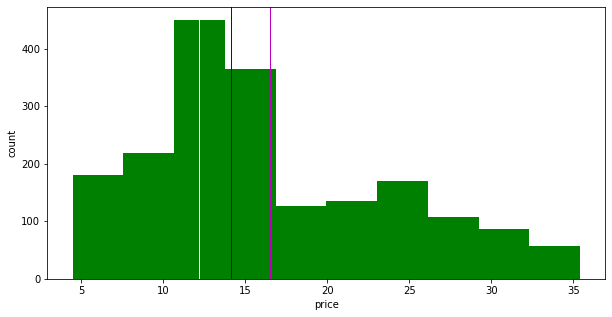

In [155]:
data = df['cost_of_the_order'] #creates new variable for cost of order column
plt.figure(figsize=(10,5)) #makes plot wider
plt.hist(data, color='g') 
plt.xlabel("price") #labels the axes
plt.ylabel('count') #labels the axes
plt.axvline(data.mean(), color='m', linewidth=1)
plt.axvline(data.median(), color='b', linestyle='solid', linewidth=1)
plt.axvline(data.mode()[0], color='w', linestyle='solid', linewidth=1)

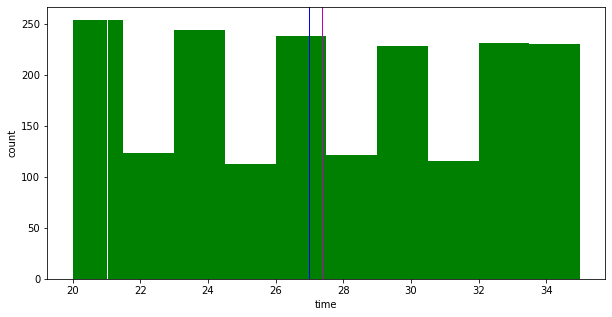

In [154]:
data1 = df['food_preparation_time']
plt.figure(figsize=(10,5)) #makes plot wider
plt.hist(data1, color='g') 
plt.xlabel("time") #labels the axes
plt.ylabel('count') #labels the axes
plt.axvline(data1.mean(), color='m', linewidth=1)
plt.axvline(data1.median(), color='b', linestyle='solid', linewidth=1)
plt.axvline(data1.mode()[0], color='w', linestyle='solid', linewidth=1)

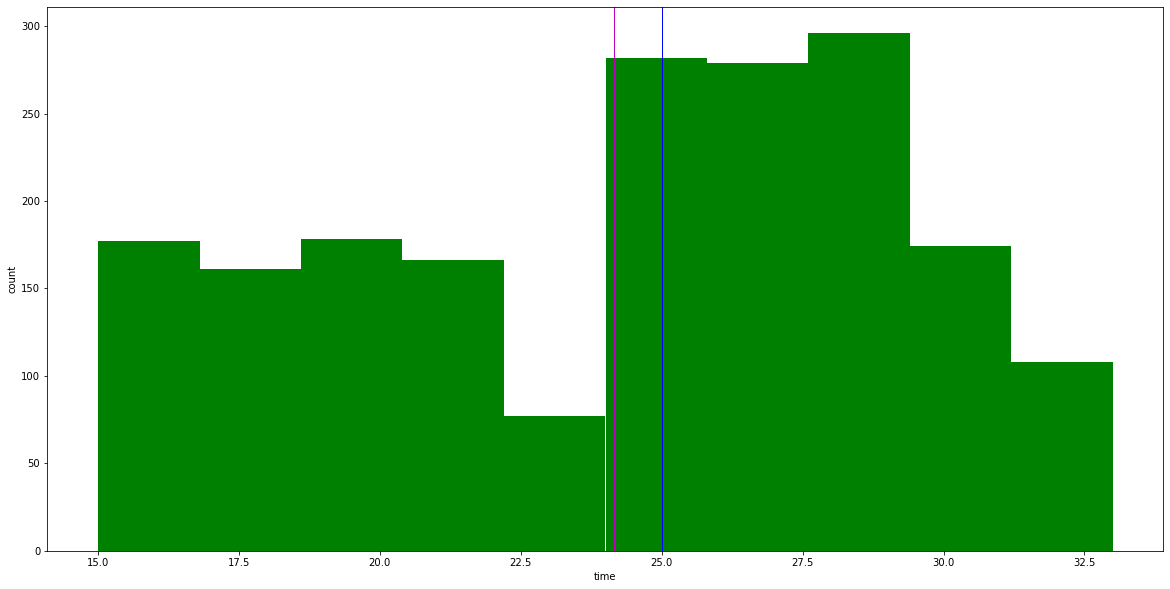

In [134]:
data2 = df['delivery_time']
plt.figure(figsize=(20,10)) #makes plot wider
plt.hist(data2, color='g') 
plt.xlabel("time") #labels the axes
plt.ylabel('count') #labels the axes
plt.axvline(data2.mean(), color='m', linewidth=1)
plt.axvline(data2.median(), color='b', linestyle='solid', linewidth=1)
plt.axvline(data2.mode()[0], color='w', linestyle='solid', linewidth=1)

In [135]:
df['day_of_the_week'].value_counts() #value counts of weekend and weekday

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [136]:
df["cuisine_type"].value_counts() #value counts of cousine types

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [137]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

### Observations The majority of orders are on weekends and the majority of orders are American, Japanese, Italian, and Chinese for cuisine type. For the price, we can see most obeservations are distributed in the first 4 bins, and can say that most of the data is between 10-25 dollars. The prep time is a litte more scattered, which shows how different the food may be to prepare due to other variables, such as cuisine type. The delivery time is averaged at 27 minutes, but is strongly distributed on the tail and head of the data.  This means that other variables are likely the reason the delivery times are so different for each order.  

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [138]:
# using .value_counts() to see which restaurant has the most orders
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations: Instead of creating a graph, I just used value counts to determine how many times the restaurant names appeared in the column.  We see that Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the most ordered restaurants. 


### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

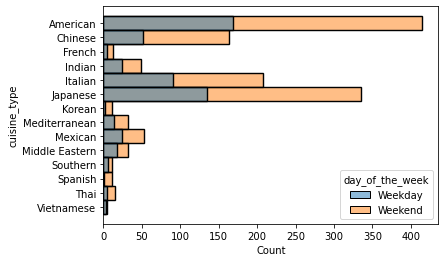

In [153]:
# write the code here
sns.histplot(y="cuisine_type", hue="day_of_the_week", data=df)
xlablel = 'Count'
ylabel = 'cuisine_type'

#### Observations: Using this histogram, with a day of the week hue, we can see that American cuisine is the most popular cuisine type on weekends, followed by Japanese, Italian, and French.


### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [140]:
# write the code here
new_df = df[(df['cost_of_the_order']>20)] #creates a new variable that stores the cost of the order when it is over $20.
print(new_df.value_counts().sum()) #counts the number of orders over $20
print(new_df.value_counts().sum()/df['cost_of_the_order'].value_counts().sum()) #divides the number of orders over $20 by all orders

555
0.2924130663856691


#### Observations: 29% of orders are above 20 dollars in the dataset.


### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [141]:
# write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations: The average delivery time is 24.16 minutes across all orders.


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [142]:
df['cost_of_the_order'].max() #use this to get the max cost of order

35.41

In [143]:
df['cost_of_the_order'].idxmax() #this tells us what the index is of the max cost of the order

573

In [144]:
df.iloc[[573]] #this outputs the entire row of the index where the cost of the order is at max.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations: Using .max() I figured out the highest order price was 35.41, then used .idxmax() to find the index of that row. Then using .iloc, I was able to output the entire row so I could see the all the order details.  The highest order was order 1477814 and it cost 35.41 dollars and was ordered by customer 62359 at the Mediterranean restaurant, Pylos.  It took 21 minutes to prepare and was delivered in 29 minutes.


### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

<AxesSubplot:>

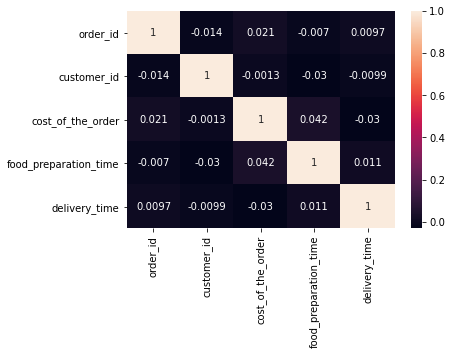

In [145]:
sns.heatmap(df.corr(), annot=True,)

In [146]:
df.groupby(['day_of_the_week']).mean() #use this to see if the average cost, prep time, and delivery time differ on weekend.

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
day_of_the_week,,,,,
Weekday,1.477483e+06,173010.771481,16.311188,27.212066,28.340037
Weekend,1.477500e+06,170422.561066,16.574833,27.436714,22.470022


In [147]:
pd.DataFrame(df.groupby('cuisine_type').size().nlargest(5))

,0
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77


### Observations Using a pairplot made it difficult to see the relationships of all the variables, so instead I used a heatmap to show correlation.  From this, we can see the only two numerical and significant variables that are related are prep time and cost of the order. Likely because a higher cost means more food, and more food means more time to prep. But correlation does not equal causation, so that is only a hypothesis. We can also see from this groupby chart that the delivery time for weekdays is longer than the delivery time for weekends. Lastly, comparing the number of orders and cuisine type, we can see the top 5 types of cuisine that is frequently ordered for delivery.  

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [148]:
newdf = df[['restaurant_name','rating']] #creating a makeshift dataframe with only columns 'restaurant name' and 'rating'
newdf = newdf[newdf.rating != 'Not given'] #excluding all values that are 'not given' in rating
newdf['rating'] = newdf['rating'].astype('int') #turning rating into an integer variable



df1 = newdf.groupby('restaurant_name').count()
df2 = newdf.groupby('restaurant_name').mean()
df1.columns=['ratings']
df2.columns=['avg_rating']
df3 = pd.concat([df1 , df2], axis=1)

df3[(df3['ratings']>50)]


,ratings,avg_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations: After converting rating into an integer, we created two new dataframes to store the number of ratings and average rating, grouped by restaurant name.  After concatting the dataframes into one, and applying my filter of number of ratings > 50, we see that Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop were the only restaurants to meet the criteria for the promotion.


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [149]:
# write the code here
cost=df[['cost_of_the_order']]
cost_20 = cost[cost.cost_of_the_order > 20]
cost_5 = cost[(cost['cost_of_the_order'] > 5) & (cost['cost_of_the_order'] <=20)]

Revenue = cost_20.sum() * 0.25 + cost_5.sum() * 0.15
Revenue

cost_of_the_order    6166.303
dtype: float64

#### Observations: First we created a new dataframe to store just the cost column of the original data frame.  Then we assign two filters. One to record all orders where the cost is greater than 20 dollars, and one to record all orders where the cost is between 5 and 20 dollars. Then we write a simple equation to multiply those sums by their revenue fees, and we get 6166.303.


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [150]:
# write the code here
df['time'] = df['food_preparation_time'] + df['delivery_time'] #creates a new column in the data frame that adds the two time columns
df[df['time']>60].count() #counts the number of orders where sum of time is greater than 60
(df[df['time']>60]['time'].count()/df['time'].count()) * 100 #calculates the percentage of how many orders take over an hour total


10.537407797681771

#### Observations: 10.54% of orders take longer than an hour to be delivered after ordering.  This is a potential problem for the service.


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [151]:
# write the code here
df4=df[['day_of_the_week','delivery_time']] #creates new dataframe with just day of the week and delivery time as columns
df4.groupby(['day_of_the_week']).mean() #groups the data by day of the week, with delivery time as the column value.


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: Surprisingly, FoodHub drivers deliver faster on weekends than on weekdays, on average.


### Conclusion and Recommendations The average cost of an order is about 16.50, which is standard for delivery. Food prep time and delivery time, on average, is also standard, about 25 minutes for each.  American and Japanese cuisine are by far the most popular cuisines in the data sample.  For some reason, delivery time takes longer on weekdays than on weekends, despite weekends having more than double the orders than weekdays. 


### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (5 marks)

#### Insights: The glaring issue here, for me, is that out of 1898, 736 orders do not have a rating.  An option to fix this would be for FoodHub to offer promotions that encourage customers to rate their order after consumption.  Another issue is that total time (prep + deliver) is longer on the weekdays than on the weekends, despite the weekends having more than double the volume. This would lead me to believe these restaurants or FoodHub are understaffed on the weekdays.  There are 5 weekdays, and 2 weekend days a week, the weekdays are just as important to maintain quality and service.  It may be beneficial to offer delivery discounts on some of the most popular restaurants to increase the number of orders/users.